## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Open up our CSV files located in the /Data subfolder
salaries_df = pd.read_csv("../Data/nba_salaries_1990_to_2018.csv")
player_data_df = pd.read_csv("../Data/player_data.csv")
players_df = pd.read_csv("../Data/Players.csv")
seasons_stats_df = pd.read_csv("../Data/Seasons_Stats.csv")
salary_cap_df = pd.read_csv("../Data/salary_cap.csv")

In [3]:
# Glimpse of our data
salaries_df.head()

,player,salary,season_end,season_start,team,team_name
0,Moses Malone,2406000,1991,1990,ATL,Atlanta Hawks
1,Dominique Wilkins,2065000,1991,1990,ATL,Atlanta Hawks
2,Jon Koncak,1550000,1991,1990,ATL,Atlanta Hawks
3,Doc Rivers,895000,1991,1990,ATL,Atlanta Hawks
4,Rumeal Robinson,800000,1991,1990,ATL,Atlanta Hawks


In [4]:
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [5]:
players_df.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [6]:
print(seasons_stats_df.columns)
seasons_stats_df.head()

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [7]:
salary_cap_df

,Season,Nominal,Real
0,1984-85,"$3,600,000","$7,934,034"
1,1985-86,"$4,233,000","$9,153,509"
2,1986-87,"$4,945,000","$10,317,292"
3,1987-88,"$6,164,000","$12,354,015"
4,1988-89,"$7,232,000","$13,829,137"
5,1989-90,"$9,802,000","$17,783,913"
6,1990-91,"$11,871,000","$20,658,962"
7,1991-92,"$12,500,000","$21,113,943"
8,1992-93,"$14,000,000","$22,972,126"
9,1993-94,"$15,175,000","$24,268,416"


# Clean data

In [8]:
# We only have salary information from 1990 onwards
clean_player_data_df = player_data_df[player_data_df['year_end'] >= 1990]

In [9]:
clean_seasons_stats_df = seasons_stats_df[seasons_stats_df['Year'] >= 1990].drop(['Unnamed: 0', 'blanl', 'blank2'], 'columns')
clean_seasons_stats_df = clean_seasons_stats_df.groupby('Player').apply(lambda x: x.drop_duplicates(subset=['Year'])).reset_index(drop=True)

In [10]:
clean_body_stats_df = players_df[['Player', 'height', 'weight']]

In [11]:
clean_salaries_df = salaries_df.drop(['team', 'team_name'], 'columns')

In [12]:
salary_cap_df['Season'] = salary_cap_df['Season'].str.split("-").str[0].astype(int)
salary_cap_df = salary_cap_df.set_index('Season')
salary_cap_df = salary_cap_df[salary_cap_df.columns[0:]].replace('[\$,]', '', regex=True).astype(float)
salary_cap_df = salary_cap_df.dropna()
salary_cap_df.head()

,Nominal,Real
Season,,
1984,3600000.0,7934034.0
1985,4233000.0,9153509.0
1986,4945000.0,10317292.0
1987,6164000.0,12354015.0
1988,7232000.0,13829137.0


# Analyzing raw data

### Examining Salary Inflation

In [13]:
salary_cap_df.head()

,Nominal,Real
Season,,
1984,3600000.0,7934034.0
1985,4233000.0,9153509.0
1986,4945000.0,10317292.0
1987,6164000.0,12354015.0
1988,7232000.0,13829137.0


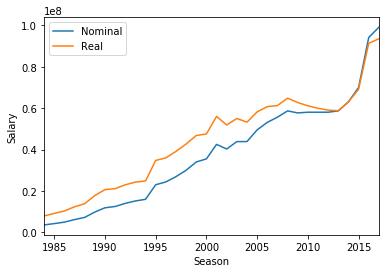

In [14]:
# Looking at the salary cap inflation over time
lines = salary_cap_df.plot.line()
plt.ylabel('Salary')
plt.show()

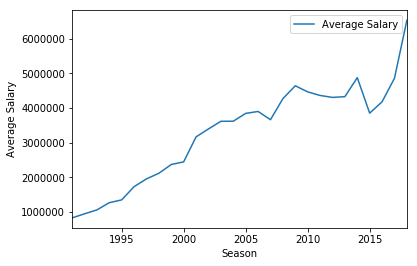

In [15]:
# Get the average salary over the years 1990-2018
avg_salaries = salaries_df.groupby('season_end')['salary', 'season_end'].transform('mean').drop_duplicates()
avg_salaries.columns = ['Average Salary', 'Season']
avg_salaries = avg_salaries.set_index('Season')
avg_salaries.plot.line()
plt.ylabel('Average Salary')
plt.show()

In [16]:
salary_cap_df = pd.concat([salary_cap_df, avg_salaries], axis=1, join_axes=[salary_cap_df.index])
salary_cap_df.head()

,Nominal,Real,Average Salary
Season,,,
1984,3600000.0,7934034.0,NaN
1985,4233000.0,9153509.0,NaN
1986,4945000.0,10317292.0,NaN
1987,6164000.0,12354015.0,NaN
1988,7232000.0,13829137.0,NaN


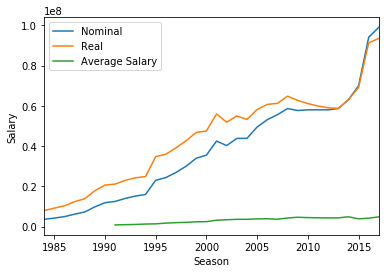

In [17]:
lines = salary_cap_df.plot.line()
plt.ylabel('Salary')
plt.show()

We see that the average salary is much below the salary cap.  This is because the salary cap is the absolute maximum a NBA team can pay their entire roster (before entering the luxury tax), whereas the average salary is for just a single NBA player.  A better comparison would be to compare the relationship between the salary cap inflation and the average salary inflation (and maybe compare to the US inflation).

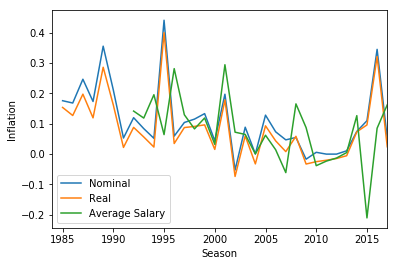

In [18]:
salary_inflation = salary_cap_df.pct_change()
lines = salary_inflation.plot.line()
plt.ylabel('Inflation')
plt.show()

We see that there isn't too strong of a correlation between the inflation in the salary cap and the inflation in player salaries.  In building our models, we will again test if including the particular season's salary cap (instead of just the year) improves our performance.  Our examination of the salary cap and salaries inflation indicates that it may to some extent.

### Examining salary distribution

In this section, we want to examine the distribution of player salaries.

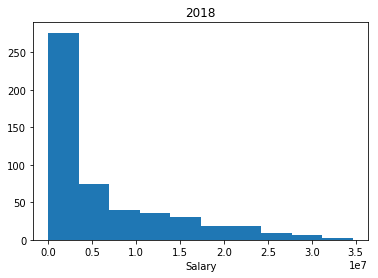

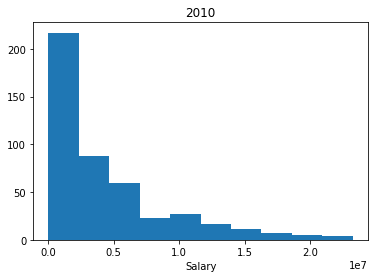

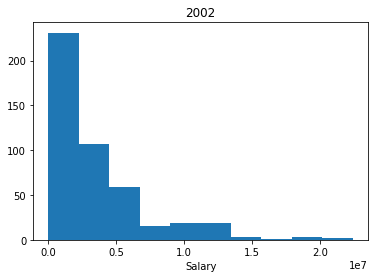

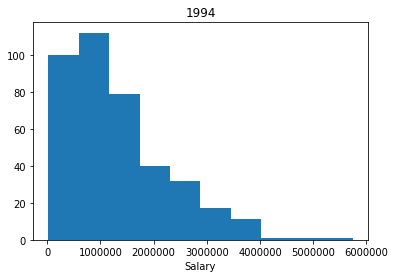

In [19]:
sample_years = [2018,2010,2002,1994]
for year in sample_years:
    salaries = clean_salaries_df[clean_salaries_df['season_end'] == year]['salary']
    plt.hist(salaries)
    plt.xlabel('Salary')
    plt.title(year)
    plt.show()

As we would expect, salaries are quite right-skewed distributions and are becoming increasingly so. We try to make the distribution a bit more "normal":

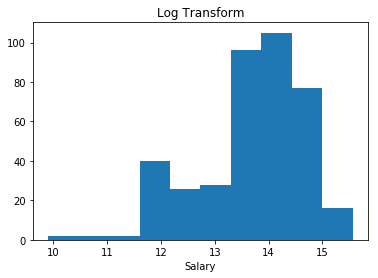

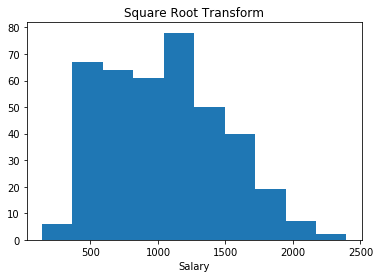

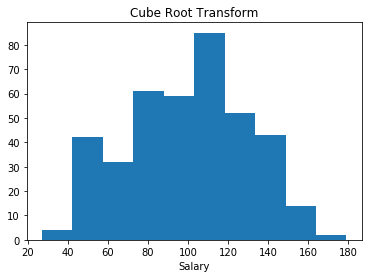

In [20]:
import math
salaries_2006 = clean_salaries_df[clean_salaries_df['season_end'] == 2006]['salary']
plt.hist(salaries.map(math.log))
plt.xlabel('Salary')
plt.title('Log Transform')
plt.show()
plt.hist(salaries.map(math.sqrt))
plt.xlabel('Salary')
plt.title('Square Root Transform')
plt.show()
plt.hist(salaries.map(lambda x: math.pow(x, 1/3)))
plt.xlabel('Salary')
plt.title('Cube Root Transform')
plt.show()

# Transform data

In [21]:
from scipy import stats

In [22]:
features_seasons_stats_df = clean_seasons_stats_df.copy()

In [23]:
features_body_stats_df = clean_body_stats_df.copy()

# Join data

In [24]:
features_salaries_df = clean_salaries_df.copy()
features_salaries_df['cube_root_salary'] = np.cbrt(features_salaries_df['salary']) #.map(lambda x: math.pow(x, 1/3))
features_salaries_df['season_salary_z'] = features_salaries_df.groupby('season_end')['cube_root_salary'].transform(stats.zscore)
features_salaries_df['next_season_salary_z'] = features_salaries_df.groupby('player')['season_salary_z'].shift(-1)
features_salaries_df = features_salaries_df.dropna(subset=['next_season_salary_z'])
features_salaries_df.head()

,player,salary,season_end,season_start,cube_root_salary,season_salary_z,next_season_salary_z
0,Moses Malone,2406000,1991,1990,133.998069,1.895577,0.990715
1,Dominique Wilkins,2065000,1991,1990,127.342494,1.623581,2.102462
2,Jon Koncak,1550000,1991,1990,115.729453,1.148985,1.338753
3,Doc Rivers,895000,1991,1990,96.369812,0.357806,0.572878
4,Rumeal Robinson,800000,1991,1990,92.831777,0.213215,0.368960


In [100]:
features_df = features_seasons_stats_df.merge(features_body_stats_df, how='inner', on='Player')
features_df = features_df.merge(features_salaries_df, how='inner', left_on=['Player', 'Year'], right_on=['player', 'season_end'])
features_df = features_df.drop(['Year', 'Player'], 'columns').set_index(['player', 'season_end'])
features_df.head()

Pos   Age   Tm     G    GS      MP   PER    TS%   3PAr  \
player     season_end                                                          
A.C. Green 1991        PF  27.0  LAL  82.0  21.0  2164.0  13.8  0.556  0.101   
           1992        PF  28.0  LAL  82.0  53.0  2902.0  16.7  0.556  0.070   
           1993        PF  29.0  LAL  82.0  55.0  2819.0  16.3  0.603  0.065   
           1994        PF  30.0  PHO  82.0  55.0  2825.0  17.0  0.555  0.038   
           1995        SF  31.0  PHO  82.0  52.0  2687.0  14.2  0.596  0.206   

                         FTr  ...    TOV     PF     PTS  height  weight  \
player     season_end         ...                                         
A.C. Green 1991        0.557  ...   99.0  117.0   750.0   203.0   106.0   
           1992        0.569  ...  111.0  141.0  1116.0   203.0   106.0   
           1993        0.531  ...  116.0  149.0  1051.0   203.0   106.0   
           1994        0.391  ...  100.0  142.0  1204.0   203.0   106.0   
           1995        0.556  ...  114.0  146.0   916.0   203.0   106.0   

                        salary  season_start  cube_root_salary  \
player     season_end                                            
A.C. Green 1991        1750000          1990        120.507113   
           1992        1750000          1991        120.507113   
           1993        1750000          1992        120.507113   
           1994        1885000          1993        123.529434   
           1995        6472600          1994        186.362956   

                       season_salary_z  next_season_salary_z  
player     season_end                                         
A.C. Green 1991               1.344236              1.127381  
           1992               1.127381              0.913002  
           1993               0.913002              0.087104  
           1994               0.788382              2.509463  
           1995               2.509463              2.239567  

[5 rows x 55 columns]

In [117]:
features_df.columns.tolist()

['Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'height',
 'weight',
 'salary',
 'season_start',
 'cube_root_salary',
 'season_salary_z',
 'next_season_salary_z']

# Feature selection

In [118]:
# [G, GS, MP, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, blanl, OWS, DWS, WS, WS/48, blank2, OBPM, DBPM, BPM, VORP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS]
features = ['Pos',
 'Age',
 #'Tm',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'height',
 'weight',
 #'salary',
 'season_start',
 'season_salary_z']

In [119]:
features_df = features_df.dropna()
X_df = features_df[features]
y_df = features_df["next_season_salary_z"]
X_df = pd.concat([X_df,pd.get_dummies(X_df['Pos'], prefix='Pos')],axis=1)
X_df = X_df.drop(['Pos'], axis=1)
X_df = X_df.drop(['season_salary_z'], axis=1)
X_df.head()
# list(X_df.columns.values)

Age     G    GS      MP   PER    TS%   3PAr    FTr  \
player     season_end                                                        
A.C. Green 1991        27.0  82.0  21.0  2164.0  13.8  0.556  0.101  0.557   
           1992        28.0  82.0  53.0  2902.0  16.7  0.556  0.070  0.569   
           1993        29.0  82.0  55.0  2819.0  16.3  0.603  0.065  0.531   
           1994        30.0  82.0  55.0  2825.0  17.0  0.555  0.038  0.391   
           1995        31.0  82.0  52.0  2687.0  14.2  0.596  0.206  0.556   

                       ORB%  DRB%  ...  Pos_PG  Pos_PG-SF  Pos_PG-SG  Pos_SF  \
player     season_end              ...                                         
A.C. Green 1991        11.3  16.2  ...       0          0          0       0   
           1992        11.8  18.2  ...       0          0          0       0   
           1993        11.5  17.3  ...       0          0          0       0   
           1994        11.1  18.8  ...       0          0          0       0   
           1995         8.3  20.4  ...       0          0          0       1   

                       Pos_SF-PF  Pos_SF-SG  Pos_SG  Pos_SG-PF  Pos_SG-PG  \
player     season_end                                                       
A.C. Green 1991                0          0       0          0          0   
           1992                0          0       0          0          0   
           1993                0          0       0          0          0   
           1994                0          0       0          0          0   
           1995                0          0       0          0          0   

                       Pos_SG-SF  
player     season_end             
A.C. Green 1991                0  
           1992                0  
           1993                0  
           1994                0  
           1995                0  

[5 rows x 65 columns]

In [120]:
# Optionally we can normalize all features (this gives super whack results for the testing/training scores)
# # Get column names first
# names = X_df.columns
# # Create the Scaler object
# scaler = preprocessing.StandardScaler()
# # Fit your data on the scaler object
# scaled_df = scaler.fit_transform(X_df)
# X_df = pd.DataFrame(scaled_df, columns=names)

# Data partitioning

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X = X_df.values
y = y_df.values
y_c = pd.qcut(y, 5, labels=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_c_train, y_c_test = train_test_split(X, y_c, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5149, 65)
(5149,)
(2207, 65)
(2207,)


# Train

In [123]:
from sklearn.model_selection import cross_validate

## Regression Models

### Linear Models

In [124]:
from sklearn import linear_model, svm

In [125]:
# Ordinary Least Squares Regression
ols = linear_model.LinearRegression()
results = cross_validate(ols, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.43555016608579755
Average Training Score: 0.450647749212859


In [126]:
# Ridge Regression
ridge = linear_model.Ridge()
results = cross_validate(ridge, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.4362513729867478
Average Training Score: 0.44991479928329586


In [127]:
# Lasso Regression
lasso = linear_model.Lasso()
results = cross_validate(lasso, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.35418598830778325
Average Training Score: 0.35600993136878556


In [128]:
# Elastic Net Regression
elastic = linear_model.ElasticNet()
results = cross_validate(elastic, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.3791577074670496
Average Training Score: 0.3815746626266655


### SVR

In [ ]:
linear_svr = svm.SVR(kernel='linear')
cross_validate(linear_svr, X_train, y_train, scoring='r2', cv=5, n_jobs=5)

In [ ]:
rbf_svr = svm.SVR(kernel='rbf', gamma='scale')
cross_validate(rbf_svr, X_train, y_train, scoring='r2', cv=5, n_jobs=5)

## Classification Models

### SVC

In [ ]:
linear_svc = svm.SVC(kernel='linear')
cross_validate(linear_svc, X_train, y_c_train, scoring='accuracy', cv=5, n_jobs=5)